In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib as mb

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
korelasi = data.corr()
korelasi

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.654095,0.680270,0.935949,0.419805,0.433411,0.095608,0.010350,0.018117,0.116340,...,-0.002100,0.032927,0.008989,0.021384,0.045226,0.618692,0.753415,0.087989,-0.025299,0.179897
new_cases,0.654095,1.000000,0.968122,0.695148,0.645625,0.629133,0.045491,0.056857,0.077137,0.067995,...,0.001578,0.030344,0.023191,0.026141,0.047542,0.544358,0.322553,0.052788,0.092070,0.048563
new_cases_smoothed,0.680270,0.968122,1.000000,0.718937,0.639214,0.651836,0.048222,0.046981,0.079816,0.070962,...,0.001643,0.031038,0.023693,0.026778,0.048778,0.561844,0.415955,0.036366,0.064780,0.061227
total_deaths,0.935949,0.695148,0.718937,1.000000,0.588106,0.606327,0.041457,0.002413,0.003818,0.125963,...,-0.001886,0.043137,-0.006207,0.016685,0.040449,0.718372,0.926660,0.273309,0.011921,0.290093
new_deaths,0.419805,0.645625,0.639214,0.588106,1.000000,0.975854,-0.034799,0.010371,0.010433,0.025477,...,0.002106,0.042129,-0.001039,0.016916,0.040737,0.676698,0.333352,0.219871,0.353604,0.054948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
population,0.618692,0.544358,0.561844,0.718372,0.676698,0.694053,-0.062347,-0.018466,-0.031255,-0.052455,...,0.016579,0.036033,-0.022640,-0.017378,0.000458,1.000000,0.750012,0.159205,0.045425,0.090476
excess_mortality_cumulative_absolute,0.753415,0.322553,0.415955,0.926660,0.333352,0.527214,0.050741,-0.032009,-0.027337,0.304240,...,-0.092286,-0.032253,-0.142910,-0.195272,-0.111159,0.750012,1.000000,0.355282,0.061908,0.378408
excess_mortality_cumulative,0.087989,0.052788,0.036366,0.273309,0.219871,0.198373,0.076477,0.013694,-0.017192,0.547036,...,-0.033277,-0.002228,-0.257260,-0.310909,-0.450336,0.159205,0.355282,1.000000,0.423886,0.686674
excess_mortality,-0.025299,0.092070,0.064780,0.011921,0.353604,0.286817,-0.059611,0.108770,0.102539,0.042228,...,0.067800,-0.014826,-0.094437,-0.199660,-0.263461,0.045425,0.061908,0.423886,1.000000,0.173184


<AxesSubplot:>

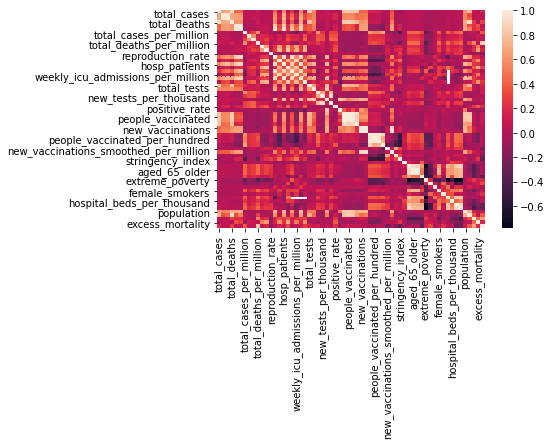

In [8]:
import seaborn as sea
sea.heatmap(korelasi)

In [17]:
data['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [23]:
# Filter baris yang memiliki kata 'OWID' di kolom 'nama_kolom'
data_filtered = data[data['iso_code'].str.contains('OWID')]

# Mengambil nilai unik dari kolom 'nama_kolom'
unique_data = data_filtered['iso_code'].unique()
unique_data

array(['OWID_AFR', 'OWID_ASI', 'OWID_ENG', 'OWID_EUR', 'OWID_EUN',
       'OWID_HIC', 'OWID_INT', 'OWID_KOS', 'OWID_LIC', 'OWID_LMC',
       'OWID_NAM', 'OWID_CYN', 'OWID_NIR', 'OWID_OCE', 'OWID_SCT',
       'OWID_SAM', 'OWID_UMC', 'OWID_WLS', 'OWID_WRL'], dtype=object)

In [18]:
# Mengekstrak data yang berlokasi di China
china_data = data[data['location'] == 'China']

# Mengekstrak kolom
tab_china = china_data[['location','date','total_deaths', 'median_age','aged_65_older','aged_70_older']]

tab_china.head()

,location,date,total_deaths,median_age,aged_65_older,aged_70_older
45118,China,2020-01-22,17.0,38.7,10.641,5.929
45119,China,2020-01-23,18.0,38.7,10.641,5.929
45120,China,2020-01-24,26.0,38.7,10.641,5.929
45121,China,2020-01-25,42.0,38.7,10.641,5.929
45122,China,2020-01-26,56.0,38.7,10.641,5.929


In [34]:
print(tab_china['median_age'].unique())
print(tab_china['aged_65_older'].unique())
print(tab_china['aged_70_older'].unique())

[38.7]
[10.641]
[5.929]


In [17]:
# Mengekstrak data yang berlokasi di United States
us_data = data[data['location'] == 'United States']

# Mengekstrak kolom
tab_us = us_data[['location','date','total_deaths', 'median_age','aged_65_older','aged_70_older']]

tab_us.head()

,location,date,total_deaths,median_age,aged_65_older,aged_70_older
235343,United States,2020-01-22,NaN,38.3,15.413,9.732
235344,United States,2020-01-23,NaN,38.3,15.413,9.732
235345,United States,2020-01-24,NaN,38.3,15.413,9.732
235346,United States,2020-01-25,NaN,38.3,15.413,9.732
235347,United States,2020-01-26,NaN,38.3,15.413,9.732


In [31]:
print(tab_us['median_age'].unique())
print(tab_us['aged_65_older'].unique())
print(tab_us['aged_70_older'].unique())

[38.3]
[15.413]
[9.732]


In [19]:
# Mengekstrak data yang berlokasi di France 
france_data = data[data['location'] == 'France']

# Mengekstrak kolom
tab_france = france_data[['location','date','total_deaths', 'median_age','aged_65_older','aged_70_older']]

tab_france.head()

,location,date,total_deaths,median_age,aged_65_older,aged_70_older
78248,France,2020-01-24,NaN,42.0,19.718,13.079
78249,France,2020-01-25,NaN,42.0,19.718,13.079
78250,France,2020-01-26,NaN,42.0,19.718,13.079
78251,France,2020-01-27,NaN,42.0,19.718,13.079
78252,France,2020-01-28,NaN,42.0,19.718,13.079


In [32]:
print(tab_france['median_age'].unique())
print(tab_france['aged_65_older'].unique())
print(tab_france['aged_70_older'].unique())

[42.]
[19.718]
[13.079]


In [20]:
# Mengekstrak data yang berlokasi di Germany 
germany_data = data[data['location'] == 'Germany']

# Mengekstrak kolom
tab_germany = germany_data[['location','date','total_deaths', 'median_age','aged_65_older','aged_70_older']]

tab_germany.head()

,location,date,total_deaths,median_age,aged_65_older,aged_70_older
83503,Germany,2020-01-27,NaN,46.6,21.453,15.957
83504,Germany,2020-01-28,NaN,46.6,21.453,15.957
83505,Germany,2020-01-29,NaN,46.6,21.453,15.957
83506,Germany,2020-01-30,NaN,46.6,21.453,15.957
83507,Germany,2020-01-31,NaN,46.6,21.453,15.957


In [33]:
print(tab_germany['median_age'].unique())
print(tab_germany['aged_65_older'].unique())
print(tab_germany['aged_70_older'].unique())

[46.6]
[21.453]
[15.957]


# Answer for Q2:

In the second question, it is asked about the relationship between the number of deaths and age in several countries. From analyzing the given dataset, the columns that are related to age are only present in the median_age, aged_65_older, and aged_70_older columns. Upon closer observation of each column in the specified countries, it can be seen that the values do not change or are the same, as seen by using the unique() function. Therefore, it is difficult to find a relationship between the number of deaths and age as one of the variable has unchanging values, so I think there is no relationship between the number of deaths and age.
